# 1. dplyr을 이용한 데이터핸들링 기초

|    dplyr 함수 |   기능   | 
|:----------------:|:----------------:|
| filter( ) | 행추출 |
| select( ) | 열(변수)추출 |
| arrange( ) | 정렬 |
| mutate( ) | 변수 추가 |
| summarise( ) | 통계 산출 |
| group_by( ) | 그룹화 |
| left_join( ) | 데이터 합치기(행) |
| bind_rows( ) | 데이터 합치기(열) |

In [2]:
library(dplyr)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [5]:
exam <- read.csv("./sample_data/csv_exam.csv")
head(exam)

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98


## 필터링

In [17]:
# 파이프라인 %>% 삽입 단축키 : ctrl + shift + m
# 여러가지 조건을 동시에 줄 때에는 필터함수 안에서 콤마로 연결할 수 있다. 혹은 &연산자 사용
# or연산은 '|'로 수행한다.
print(exam %>% filter(class == 1))
print(exam %>% filter(class != 1, english >= 95))
print(exam %>% filter(class != 1 & english >= 95))
print(exam %>% filter(class %in% c(1,5))) # %in% 의 활용

# 필터링 서브셋을 따로 떼어 활용하기
class2 = exam %>% filter(class == 2)
mean(class2$math)

  id class math english science
1  1     1   50      98      50
2  2     1   60      97      60
3  3     1   45      86      78
4  4     1   30      98      58
  id class math english science
1  9     3   20      98      15
2 10     3   50      98      45
3 13     4   46      98      65
4 16     4   58      98      65
  id class math english science
1  9     3   20      98      15
2 10     3   50      98      45
3 13     4   46      98      65
4 16     4   58      98      65
  id class math english science
1  1     1   50      98      50
2  2     1   60      97      60
3  3     1   45      86      78
4  4     1   30      98      58
5 17     5   65      68      98
6 18     5   80      78      90
7 19     5   89      68      87
8 20     5   78      83      58


[1] 61.25

## select

In [22]:
# 여러 column 선택시에는 filter에서와 마찬가지로 콤마로 연결하여 전달
# 변수명 앞에 '-'를 붙여 제외가능
print(head(exam  %>% select(math)))
print(head(exam  %>% select(math, english)))
print(head(exam  %>% select(-math)))
print(head(exam  %>% select(-math, -english)))

  math
1   50
2   60
3   45
4   30
5   25
6   50
  math english
1   50      98
2   60      97
3   45      86
4   30      98
5   25      80
6   50      89
  id class english science
1  1     1      98      50
2  2     1      97      60
3  3     1      86      78
4  4     1      98      58
5  5     2      80      65
6  6     2      89      98
  id class science
1  1     1      50
2  2     1      60
3  3     1      78
4  4     1      58
5  5     2      65
6  6     2      98


In [44]:
# 함수 조합
print(exam  %>% filter(class == 1)  %>% select(english))
print(exam  %>% select(english, math)  %>% head(3))

  english
1      98
2      97
3      86
4      98
  english math
1      98   50
2      97   60
3      86   45


## sorting

In [31]:
# arrange() 함수내에 정렬 기준으로 삼을 변수를 전달하여 sorting 진행
# 내림차순은 desc을 이용
print(exam  %>% arrange(math)  %>% head)
print(exam  %>% arrange(desc(math))  %>% head)

print(exam  %>% arrange(math, id)  %>% head) # 정렬 기준변수를 여러개 지정
print(exam  %>% arrange(desc(math, id))  %>% head)

  id class math english science
1  9     3   20      98      15
2  5     2   25      80      65
3  4     1   30      98      58
4  3     1   45      86      78
5 12     3   45      85      32
6 13     4   46      98      65
  id class math english science
1  8     2   90      78      25
2 19     5   89      68      87
3  7     2   80      90      45
4 18     5   80      78      90
5 20     5   78      83      58
6 15     4   75      56      78
  id class math english science
1  9     3   20      98      15
2  5     2   25      80      65
3  4     1   30      98      58
4  3     1   45      86      78
5 12     3   45      85      32
6 13     4   46      98      65
  id class math english science
1  8     2   90      78      25
2 19     5   89      68      87
3  7     2   80      90      45
4 18     5   80      78      90
5 20     5   78      83      58
6 15     4   75      56      78


## 파생변수

In [39]:
# mutate( 파생변수명 = expresstion, ...  )
print(
exam  %>% mutate(tot = math + english + science,
                 mean = (math + english + science)/3)  %>% 
          arrange(desc(mean))  %>% head
)

print(
exam  %>% mutate(test = ifelse(science >= 60, "pass", "fail"))  %>% head(5)
)

  id class math english science tot     mean
1 18     5   80      78      90 248 82.66667
2 19     5   89      68      87 244 81.33333
3  6     2   50      89      98 237 79.00000
4 17     5   65      68      98 231 77.00000
5 16     4   58      98      65 221 73.66667
6 20     5   78      83      58 219 73.00000
  id class math english science test
1  1     1   50      98      50 fail
2  2     1   60      97      60 pass
3  3     1   45      86      78 pass
4  4     1   30      98      58 fail
5  5     2   25      80      65 pass


## grouping & summary 

In [11]:
print(exam  %>% summarise(mean_math = mean(math)))
print(mean(exam$math))

# 집단별 집계
exam %>% group_by(class)  %>% summarise(mean_math = mean(math),
                                        sum_math = sum(math),
                                        median_math = median(math),
                                        min_math = min(math),
                                        sd_math = sd(math),
                                        n = n())

mpg = as.data.frame(ggplot2::mpg)
mpg %>% 
    group_by(manufacturer, drv)  %>% 
    summarise(mean_cty = mean(cty))  %>% 
    head(5)

  mean_math
1     57.45
[1] 57.45


class,mean_math,sum_math,median_math,min_math,sd_math,n
1,46.25,185,47.5,30,12.500000,4
2,61.25,245,65.0,25,29.545163,4
3,45.00,180,47.5,20,18.708287,4
4,56.75,227,53.0,46,13.250786,4
5,78.00,312,79.0,65,9.899495,4


manufacturer,drv,mean_cty
audi,4,16.81818
audi,f,18.85714
chevrolet,4,12.50000
chevrolet,f,18.80000
chevrolet,r,14.10000


In [9]:
colnames(mpg)

[1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"

In [13]:
mpg  %>% 
    group_by(manufacturer) %>% 
    filter(class == 'suv')  %>% 
    mutate(mean_y = (cty + hwy)/2)  %>% 
    arrange(desc(mean_y))  %>% 
    head(5)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_y
subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv,23.5
subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv,23.0
subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv,22.0
subaru,forester awd,2.5,1999,4,manual(m5),4,18,25,r,suv,21.5
subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv,21.0


## merge

In [14]:
# 열방향으로 합치기 (변수추가), 기준변수 id로 지정
test1 = data.frame(id = c(1,2,3,4),
                   score1 = c(50,24,60,73))
test2 = data.frame(id = c(1,2,3,4),
                   score2 = c(50,24,60,73))

# same with cbind(test1, test2$score2)
total = left_join(test1, test2, by  = "id"); total

id,score1,score2
1,50,50
2,24,24
3,60,60
4,73,73


In [16]:
name = data.frame(class = c(1,2,3,4,5),
                  teacher = c("kim",'lee','park','choi','jung'))
exam_expand = left_join(exam, name, by = "class"); head(exam_expand, 10)

id,class,math,english,science,teacher
1,1,50,98,50,kim
2,1,60,97,60,kim
3,1,45,86,78,kim
4,1,30,98,58,kim
5,2,25,80,65,lee
6,2,50,89,98,lee
7,2,80,90,45,lee
8,2,90,78,25,lee
9,3,20,98,15,park
10,3,50,98,45,park


In [20]:
g1 = data.frame(id = c(1,2,3,4,5),
                test = c(60,80,70,93,85))
g2 = data.frame(id = c(6,7,8,9,10),
                test = c(70,82,71,98,81))

group_all = bind_rows(g1, g2)
print(group_all)
#same with rbind(g1, g2)

   id test
1   1   60
2   2   80
3   3   70
4   4   93
5   5   85
6   6   70
7   7   82
8   8   71
9   9   98
10 10   81
   id test
1   1   60
2   2   80
3   3   70
4   4   93
5   5   85
6   6   70
7   7   82
8   8   71
9   9   98
10 10   81


# 2. missing value, outlier 처리

## remove, imputate NA

In [40]:
df = data.frame(sex = c("M",'F',NA,'M','F'),
                score = c(5, 4, 3, 4, NA))
# 결측값 확인
print(is.na(df))
# 결측값 개수 확인
print(table(is.na(df)))
print(table(is.na(df$score)))
# 결측값 포함자료에 집계함수
print(mean(df$score))
# 결측값 제거 (데이터에서 직접 제거)
print(df  %>%  filter(!is.na(score))  %>% summarise(ms = mean(score)))
print(df  %>%  filter(!is.na(score) & !is.na(sex)))
print(na.omit(df))
# 결측값 제거 (함수 연산과정에서 거르기)
print(mean(df$score, na.rm = T))

exam[c(3,8,15), "math"] = NA
print(
exam  %>% summarise(mean_m = mean(math, na.rm = T),
                    sun_m = sum(math, na.rm = T),
                    median_m = median(math, na.rm = T))
)
# 결측값 대체 - 결측이면 결측제외하고 계산한 평균으로 대체
exam$math = ifelse(is.na(exam$math), mean(exam$math, na.rm = T), exam$math)
exam$math

       sex score
[1,] FALSE FALSE
[2,] FALSE FALSE
[3,]  TRUE FALSE
[4,] FALSE FALSE
[5,] FALSE  TRUE

FALSE  TRUE 
    8     2 

FALSE  TRUE 
    4     1 
[1] NA
  ms
1  4
  sex score
1   M     5
2   F     4
3   M     4
  sex score
1   M     5
2   F     4
4   M     4
[1] 4
    mean_m sun_m median_m
1 55.23529   939       50


[1] 50.00000 60.00000 55.23529 30.00000 25.00000 50.00000 80.00000 55.23529
 [9] 20.00000 50.00000 65.00000 45.00000 46.00000 48.00000 55.23529 58.00000
[17] 65.00000 80.00000 89.00000 78.00000

## refine outlier

[,1]
[1,]   12
[2,]   18
[3,]   24
[4,]   27
[5,]   37
attr(,"class")
        1 
"integer"

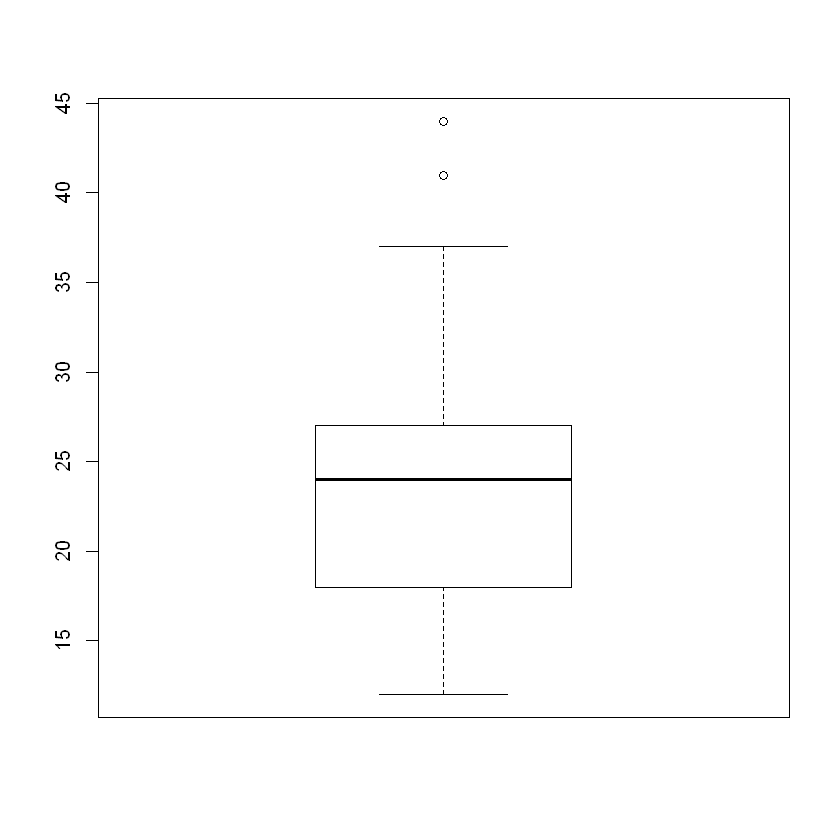

In [48]:
boxplot(mpg$hwy)$stats

In [ ]:
# 이상치를 결측값으로 설정, 이후 계산에서 거르는 방식
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy)

print(mpg  %>% group_by(drv)  %>% summarise(mean_hwy = mean(hwy, na.rm = T)))